In [89]:
import requests
import pandas as pd
import geopandas as gp
import keplergl

from matplotlib import pyplot as plt
import seaborn as sns

In [71]:
URL = 'https://api.census.gov/data/2018/acs/acs5'
QUERY = '?get=NAME,B02001_001E,B02001_002E,B02001_003E,B19301_001E&for=tract:*&in=state:37+county:021'
API_KEY = '&key=956d9dda37bee1b92b49676a4c84f6e011b15d73'

In [73]:
vals = requests.get(URL+QUERY+API_KEY).json()

In [75]:
tract_id = [v[5] + v[6] + v[7] for v in vals]
pop = [v[1] for v in vals]
white = [v[2] for v in vals]
black = [v[3] for v in vals]
income_per_capita = [v[4] for v in vals]

In [76]:
df = pd.DataFrame({'tract_id':tract_id,'pop':pop,'white':white,'black':black,'income_per_capita':income_per_capita}).drop(0).set_index('tract_id')

In [77]:
for c in df.columns:
    df[c] = df[c].astype(float)

In [78]:
df['pct_black'] = df['black']/df['pop']
df['pct_white'] = df['white']/df['pop']

In [79]:
df.sum()['black']

16095.0

In [80]:
df['pct_overall_black_population'] = df['black']/df.sum()['black']

In [81]:
df = df.reset_index()
df.sort_values(by='pct_black',ascending=False).head()

,tract_id,pop,white,black,income_per_capita,pct_black,pct_white,pct_overall_black_population
18,37021000900,3049.0,1453.0,1581.0,17257.0,0.518531,0.476550,0.098229
10,37021000700,1394.0,833.0,489.0,32856.0,0.350789,0.597561,0.030382
12,37021002000,6283.0,4266.0,1779.0,23279.0,0.283145,0.678975,0.110531
20,37021000300,2215.0,1561.0,552.0,34150.0,0.249210,0.704740,0.034296
0,37021000200,1505.0,1012.0,354.0,31936.0,0.235216,0.672425,0.021994


In [82]:
df.dtypes

tract_id                         object
pop                             float64
white                           float64
black                           float64
income_per_capita               float64
pct_black                       float64
pct_white                       float64
pct_overall_black_population    float64
dtype: object

In [83]:
shape_path = './tl_2018_37_tract' 
gpdf = gp.read_file(shape_path)
gpdf = gpdf.loc[gpdf.COUNTYFP == '021']

In [84]:
buncombe = gpdf[['GEOID','geometry']].merge(df,left_on='GEOID',right_on='tract_id',how='inner').drop(columns='GEOID')

In [85]:
m = keplergl.KeplerGl()
m.add_data(data=buncombe,name='acs5_2018')

User Guide: https://github.com/keplergl/kepler.gl/blob/master/docs/keplergl-jupyter/user-guide.md


In [86]:
m

KeplerGl(data={'acs5_2018': {'index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 2…

In [101]:
m.save_to_html(file_name="buncombe.html")

Map saved to buncombe.html!


In [98]:
buncombe.describe()

,pop,white,black,income_per_capita,pct_black,pct_white,pct_overall_black_population
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,4544.178571,4035.375000,287.410714,32504.357143,0.070800,0.880665,0.017857
std,1917.525395,1780.364616,355.792983,13765.962183,0.098170,0.101699,0.022106
min,1177.000000,833.000000,0.000000,15710.000000,0.000000,0.476550,0.000000
25%,3516.000000,3212.750000,48.750000,25421.250000,0.012864,0.846441,0.003029
50%,4407.000000,3951.000000,168.000000,30350.000000,0.037873,0.905699,0.010438
75%,5607.000000,5037.250000,379.250000,35846.000000,0.078636,0.949425,0.023563
max,9219.000000,8553.000000,1779.000000,112783.000000,0.518531,0.992981,0.110531


In [104]:
buncombe.sort_values(by='pct_black',ascending=False)[['tract_id','pop','pct_black','income_per_capita','pct_overall_black_population']].head(25).set_index('tract_id')

,pop,pct_black,income_per_capita,pct_overall_black_population
tract_id,,,,
37021000900,3049.0,0.518531,17257.0,0.098229
37021000700,1394.0,0.350789,32856.0,0.030382
37021002000,6283.0,0.283145,23279.0,0.110531
37021000300,2215.0,0.249210,34150.0,0.034296
37021000200,1505.0,0.235216,31936.0,0.021994
37021002102,5533.0,0.185975,27698.0,0.063933
37021000800,3623.0,0.178581,40547.0,0.040199
37021000100,1499.0,0.155437,33325.0,0.014477
37021001000,4622.0,0.124405,26040.0,0.035725


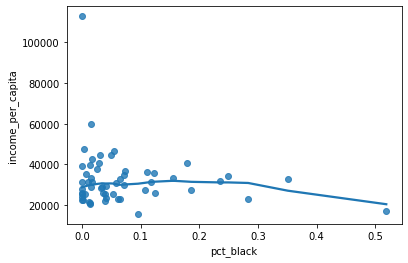

In [95]:
sns.regplot(x=buncombe.pct_black,y=buncombe.income_per_capita,lowess=True)
plt.show()

In [96]:
buncombe.corr()['pct_black']

pop                            -0.185618
white                          -0.347856
black                           0.826541
income_per_capita              -0.166170
pct_black                       1.000000
pct_white                      -0.949031
pct_overall_black_population    0.826541
Name: pct_black, dtype: float64